<a href="https://colab.research.google.com/github/ShvetsovEgor/ML/blob/main/%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


Скачайте датасет mnist

In [ ]:
mnist = tf.keras.datasets.mnist


batch_size = 256

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0
n_values = 10

y_train_full_one_hot = tf.one_hot(y_train_full, n_values)
y_test_one_hot = tf.one_hot(y_test, n_values)

11490434/11490434 [==============================] - 0s 0us/step


60% - train set,
20% - validation set,
20% - test set

In [ ]:

val_size = 0.1
size = x_train_full.shape[0]
x1 = int(size * 0.6)
x2 = int(size * 0.8)

x_train, y_train_one_hot = x_train_full[:x1], y_train_full_one_hot[:x1]
x_val, y_val_one_hot = x_train_full[x1:x2], y_train_full_one_hot[x1:x2]
x_test, y_test_one_hot = x_train_full[x2:], y_train_full_one_hot[x2:]
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train_one_hot))
train_dataset = train_dataset.shuffle(1024)
train_dataset = train_dataset.batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val_one_hot))
val_dataset = val_dataset.shuffle(1024)
val_dataset = val_dataset.batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test_one_hot))

Напишите модель, подобную модели с первой части семинара.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)
])
model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['Accuracy', 'Precision', 'Recall'])


Выведите summary модели.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 102,282
Trainable params: 102,026
Non-trainable params: 256
_________________________________________________________________


In [ ]:
%pip install livelossplot

In [ ]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

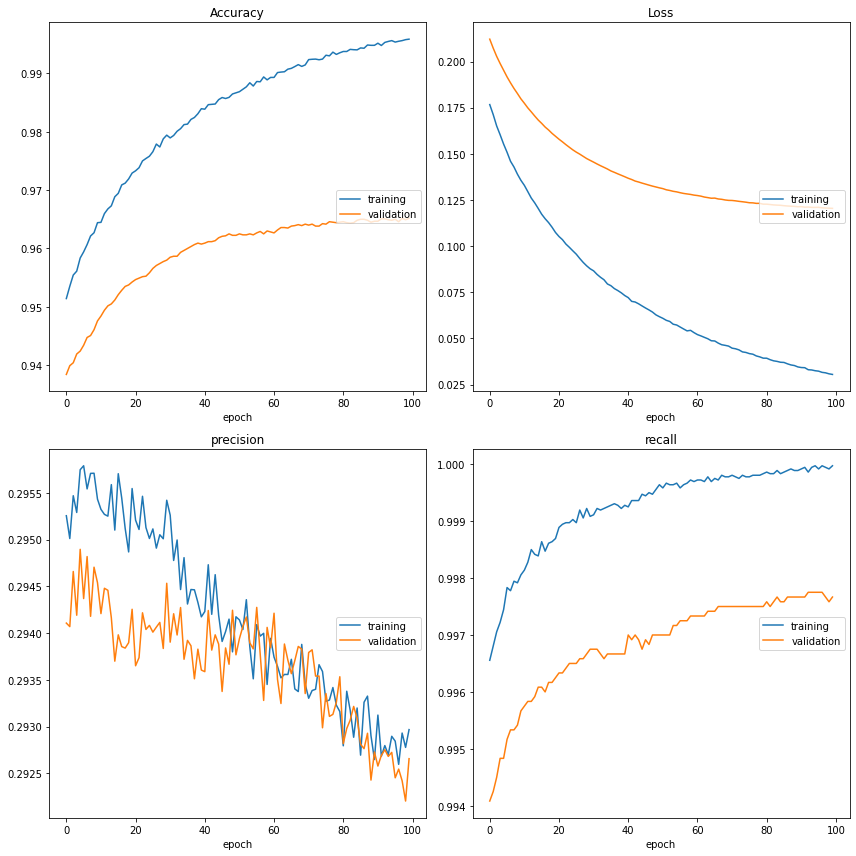

Accuracy
	training         	 (min:    0.951, max:    0.996, cur:    0.996)
	validation       	 (min:    0.938, max:    0.965, cur:    0.965)
Loss
	training         	 (min:    0.030, max:    0.177, cur:    0.030)
	validation       	 (min:    0.120, max:    0.212, cur:    0.120)
precision
	training         	 (min:    0.293, max:    0.296, cur:    0.293)
	validation       	 (min:    0.292, max:    0.295, cur:    0.293)
recall
	training         	 (min:    0.997, max:    1.000, cur:    1.000)
	validation       	 (min:    0.994, max:    0.998, cur:    0.998)


In [ ]:
from livelossplot import PlotLossesKeras

model.fit(train_dataset, validation_data=val_dataset, epochs=100, 
          callbacks=[PlotLossesKeras()], verbose=False)


In [ ]:
model.evaluate(x_test, y_test_one_hot, verbose=2)

375/375 - 1s - loss: 0.0997 - Accuracy: 0.9703 - precision: 0.2946 - recall: 0.9981 - 680ms/epoch - 2ms/step


[0.09974953532218933,
 0.9703333377838135,
 0.29460814595222473,
 0.9980833530426025]

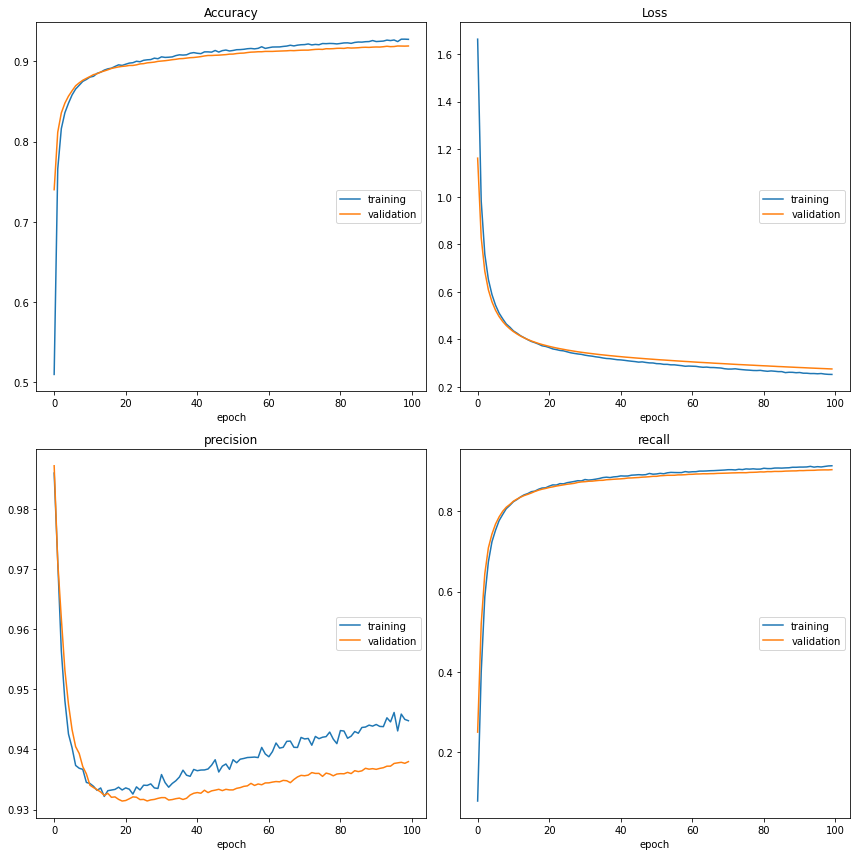

Accuracy
	training         	 (min:    0.510, max:    0.928, cur:    0.927)
	validation       	 (min:    0.740, max:    0.919, cur:    0.919)
Loss
	training         	 (min:    0.253, max:    1.663, cur:    0.253)
	validation       	 (min:    0.276, max:    1.162, cur:    0.276)
precision
	training         	 (min:    0.932, max:    0.986, cur:    0.945)
	validation       	 (min:    0.931, max:    0.987, cur:    0.938)
recall
	training         	 (min:    0.078, max:    0.913, cur:    0.913)
	validation       	 (min:    0.250, max:    0.904, cur:    0.904)


In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')])

model1.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['Accuracy', 'Precision', 'Recall'])
from livelossplot import PlotLossesKeras

model1.fit(train_dataset, validation_data=val_dataset, epochs=100, 
          callbacks=[PlotLossesKeras()], verbose=False)

In [ ]:
model1.evaluate(x_test, y_test_one_hot, verbose=2)

375/375 - 1s - loss: 0.2415 - Accuracy: 0.9315 - precision: 0.9486 - recall: 0.9185 - 916ms/epoch - 2ms/step


[0.24150975048542023,
 0.9315000176429749,
 0.9486186504364014,
 0.9185000061988831]

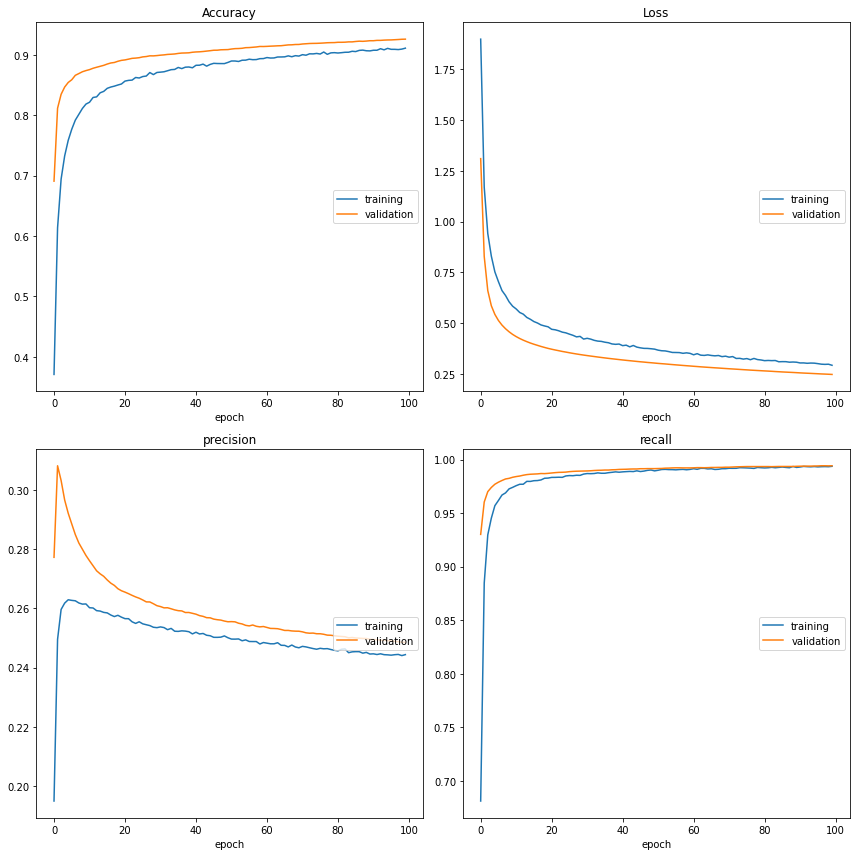

Accuracy
	training         	 (min:    0.371, max:    0.911, cur:    0.911)
	validation       	 (min:    0.691, max:    0.926, cur:    0.926)
Loss
	training         	 (min:    0.293, max:    1.899, cur:    0.293)
	validation       	 (min:    0.248, max:    1.310, cur:    0.248)
precision
	training         	 (min:    0.195, max:    0.263, cur:    0.244)
	validation       	 (min:    0.249, max:    0.308, cur:    0.249)
recall
	training         	 (min:    0.681, max:    0.994, cur:    0.994)
	validation       	 (min:    0.930, max:    0.994, cur:    0.994)


In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='softplus'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)
])
model2.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['Accuracy', 'Precision', 'Recall'])
from livelossplot import PlotLossesKeras

model2.fit(train_dataset, validation_data=val_dataset, epochs=100, 
          callbacks=[PlotLossesKeras()], verbose=False)


In [ ]:
model2.evaluate(x_test, y_test_one_hot, verbose=2)

375/375 - 1s - loss: 0.2192 - Accuracy: 0.9381 - precision: 0.2492 - recall: 0.9939 - 952ms/epoch - 3ms/step


[0.21918030083179474,
 0.9380833506584167,
 0.24917477369308472,
 0.9939166903495789]